# KLASIFIKASI

Klasifikasi dalam machine learning adalah salah satu jenis algoritma pembelajaran terawasi (supervised learning) yang bertujuan untuk mengkategorikan atau mengklasifikasikan data input ke dalam satu dari beberapa kategori yang sudah ditentukan. Klasifikasi banyak digunakan dalam berbagai aplikasi seperti pengenalan wajah, email spam detection, diagnosis medis, dan banyak lagi. Berikut ini beberapa konsep dan algoritma dasar dalam klasifikasi:
Konsep Dasar

    Training Set dan Test Set: Data biasanya dibagi menjadi dua bagian: training set (untuk melatih model) dan test set (untuk menguji performa model).
    Label: Kategori atau kelas yang menjadi target klasifikasi. Setiap contoh dalam data pelatihan memiliki label yang diketahui.
    Fitur: Atribut atau karakteristik dari data yang digunakan untuk melakukan klasifikasi.

## Decision Tree

Decision Tree adalah algoritma pembelajaran terawasi (supervised learning) yang digunakan untuk klasifikasi dan regresi. Algoritma ini menggunakan struktur pohon untuk membuat keputusan berdasarkan aturan yang diekstraksi dari fitur data. Struktur Pohon dari Decision Tree adalah sebagai berikut:

    Root Node: Node paling atas dari pohon yang mewakili seluruh dataset yang akan dibagi.
    Decision Nodes: Node yang mewakili keputusan berdasarkan nilai fitur tertentu. Decision nodes bercabang menjadi node berikutnya.
    Leaf Nodes (Terminal Nodes): Node yang tidak bercabang lagi dan mewakili kelas atau nilai akhir.


In [1]:
# Impor library yang diperlukan
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [2]:
# Memuat dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

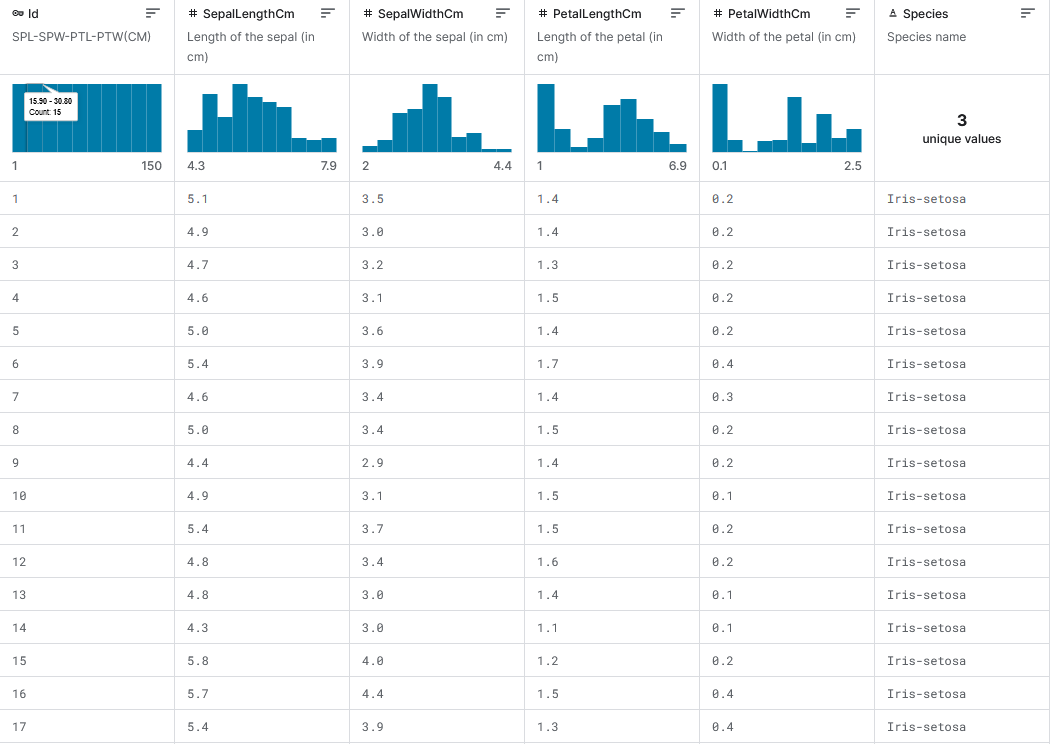

In [3]:
# Inisialisasi model Decision Tree
clf = DecisionTreeClassifier()

In [4]:
# Latih model Decision Tree
clf.fit(X, y)

DecisionTreeClassifier()

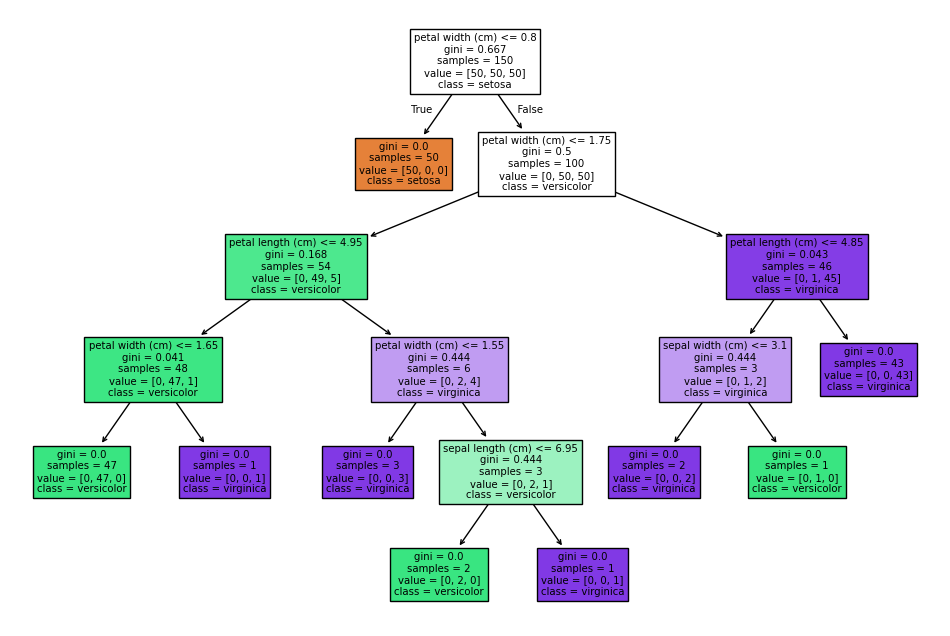

In [5]:
# Visualisasikan pohon keputusan
class_names = iris.target_names.tolist()
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=class_names)
plt.show()

## Naive Bayes

Naive Bayes adalah sekelompok algoritma klasifikasi yang didasarkan pada penerapan Teorema Bayes dengan asumsi bahwa fitur-fitur dalam dataset adalah saling independen (asumsi ini disebut "naive" karena jarang benar dalam kenyataan). Teorema Bayes memberikan cara untuk menghitung probabilitas dari suatu hipotesis berdasarkan pengetahuan sebelumnya dan bukti baru yang diperoleh:

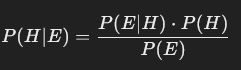

di mana:
- P(H∣E) adalah probabilitas hipotesis H yang diberikan bukti E (posterior probability).
- P(E∣H) adalah probabilitas bukti E yang diberikan hipotesis H (likelihood).
- P(H) adalah probabilitas awal hipotesis H (prior probability).
- P(E) adalah probabilitas bukti E (marginal likelihood).

In [6]:
# Impor library yang diperlukan
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [7]:
# Memuat dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

In [8]:
# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 70 % data training 30% data testing

In [9]:
# Inisialisasi model Naive Bayes
clf = GaussianNB()

In [10]:
# Latih model Naive Bayes dengan data latih
clf.fit(X_train, y_train)

GaussianNB()

In [11]:
# Lakukan prediksi menggunakan data uji
y_pred = clf.predict(X_test)

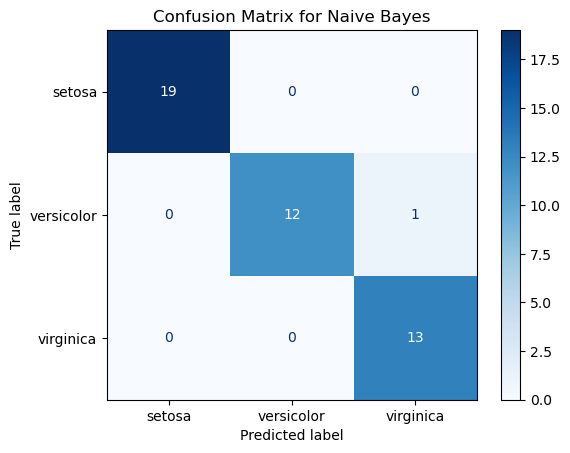

In [12]:
# Hitung dan visualisasikan confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Naive Bayes")
plt.show()

Confusion Matrix adalah alat untuk menganalisis kinerja model klasifikasi, terutama dalam kasus klasifikasi biner dan multi-kelas. Confusion Matrix menampilkan jumlah prediksi yang benar dan salah untuk setiap kelas. Dalam confusion matrix data dibagi menjadi empat komponen yaitu:

- True Positive (TP): Jumlah data positif yang diprediksi benar sebagai positif.
- False Negative (FN): Jumlah data positif yang diprediksi salah sebagai negatif.
- False Positive (FP): Jumlah data negatif yang diprediksi salah sebagai positif.
- True Negative (TN): Jumlah data negatif yang diprediksi benar sebagai negatif.

Berdasarkan Confusion Matrix, kita dapat menghitung berbagai metrik evaluasi yang penting untuk menilai kinerja model klasifikasi:
- Akurasi

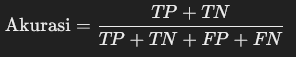

- Presisi

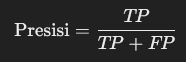

- Recall

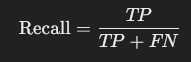

- F1 Score

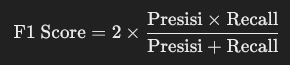

In [13]:
# Hitung akurasi prediksi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

Akurasi: 0.9777777777777777


In [14]:
# Tampilkan Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



## K-Nearest Neighbor


KNN adalah algoritma lazy learning yang berarti tidak ada proses pelatihan model yang kompleks. Model hanya "mengingat" data latih. Untuk mengklasifikasikan sebuah data baru, KNN mencari k tetangga terdekat (nearest neighbors) dari data tersebut di dalam data latih. Klasifikasi dilakukan berdasarkan mayoritas kelas dari k tetangga terdekat tersebut.


Cara Kerja KNN :

    Pilih nilai k (jumlah tetangga terdekat yang akan dipertimbangkan).
    Untuk setiap data baru yang ingin diklasifikasikan:
        Hitung jarak antara data baru dengan semua data latih. Jarak yang umum digunakan adalah jarak Euclidean.`
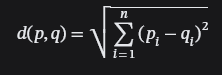

        Temukan k data latih yang paling dekat (tetangga terdekat).
        Tentukan kelas data baru berdasarkan kelas mayoritas dari k tetangga tersebut.
    Kembalikan kelas hasil prediksi.


In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# Inisialisasi dan latih model KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [26]:
# Lakukan prediksi pada data uji
y_pred = knn.predict(X_test)

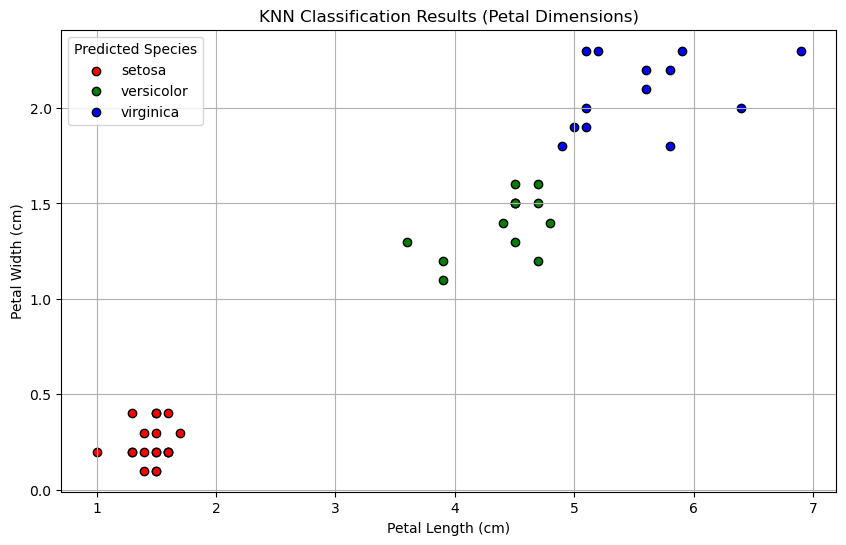

In [27]:
# Buat visualisasi
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
for i in range(3):
    plt.scatter(X_test[y_pred == i, 2], X_test[y_pred == i, 3], 
                c=colors[i], label=iris.target_names[i], edgecolor='k')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('KNN Classification Results (Petal Dimensions)')
plt.legend(title='Predicted Species')
plt.grid(True)
plt.savefig('out_knn_plot.png')
plt.show()

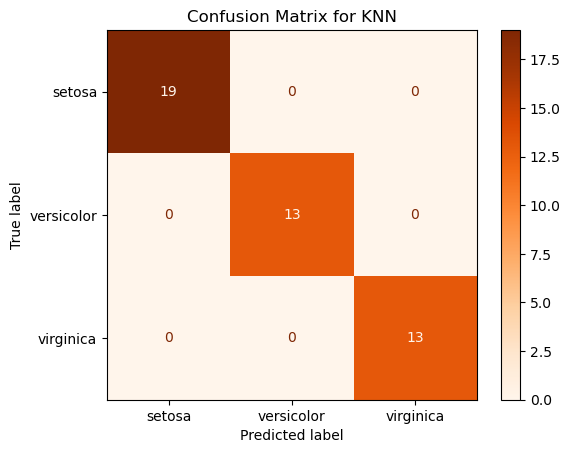

In [28]:
# Visualisasi hasil prediksi KNN dengan confusion matrix
cm_knn = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=iris.target_names)

disp_knn.plot(cmap=plt.cm.Oranges)
plt.title("Confusion Matrix for KNN")
plt.show()

In [29]:
# Evaluasi hasil prediksi
print("Akurasi KNN:", accuracy_score(y_test, y_pred))
print("\nClassification Report KNN:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Akurasi KNN: 1.0

Classification Report KNN:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

